# Bay Wheels (Ford GoBike) Bike Sharing System - 2018

## Preliminary Wrangling

[Bay Wheels](https://en.wikipedia.org/wiki/Bay_Wheels) (previously known as Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. The dataset used for this exploratory analysis consists of [monthly individual trip data](https://www.lyft.com/bikes/bay-wheels/system-data) from January 2018 to December 2018 in CSV format covering the greater San Francisco Bay area, also available [here](https://s3.amazonaws.com/baywheels-data/index.html).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

### Gathering and Assessing Data

In [2]:
# only ran once to append all monthly trip data together

folder_name = 'monthly_data'
frames = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*.csv'))]
result = pd.concat(frames, ignore_index=True)
print(result.shape)
result.sample(5)

(1863721, 14)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
1030222,789,2018-08-30 08:24:38.5560,2018-08-30 08:37:47.9730,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,1101,Subscriber,No
1706057,397,2018-11-05 15:36:37.5460,2018-11-05 15:43:14.9920,14.0,Clay St at Battery St,37.795001,-122.399970,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,2898,Subscriber,No
108970,140,2018-02-24 20:51:26.6820,2018-02-24 20:53:47.5310,95.0,Sanchez St at 15th St,37.766219,-122.431060,85.0,Church St at Duboce Ave,37.770083,-122.429156,3065,Subscriber,No
1203838,701,2018-08-01 20:10:52.7520,2018-08-01 20:22:34.5120,19.0,Post St at Kearny St,37.788975,-122.403452,81.0,Berry St at 4th St,37.775880,-122.393170,2577,Customer,No
500031,761,2018-05-22 08:51:36.7120,2018-05-22 09:04:18.1350,72.0,Page St at Scott St,37.772406,-122.435650,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,3082,Subscriber,No


In [3]:
# Save the result to .csv 

result.to_csv('fordgobike_trips_2018.csv', index=False)

In [4]:
# Load data and summary statistics

df_biketrips18 = pd.read_csv('fordgobike_trips_2018.csv')
df_biketrips18.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [5]:
df_biketrips18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


In [6]:
df_biketrips18.duplicated().sum()

0

In [7]:
df_biketrips18.user_type.value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

In [8]:
df_biketrips18.bike_share_for_all_trip.value_counts()

No     1701386
Yes     162335
Name: bike_share_for_all_trip, dtype: int64

In [9]:
df_biketrips18.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

### Cleaning Data

In [10]:
# Make a copy of the dataframe

df_biketrips18_clean = df_biketrips18.copy()

In [11]:
# Issue 1: Fix datatypes

# Code
df_biketrips18_clean['start_time'] = pd.to_datetime(df_biketrips18_clean['start_time'])
df_biketrips18_clean['end_time'] = pd.to_datetime(df_biketrips18_clean['end_time'])

df_biketrips18_clean['start_station_id'] = df_biketrips18_clean['start_station_id'].astype('str')
df_biketrips18_clean['end_station_id'] = df_biketrips18_clean['end_station_id'].astype('str')
df_biketrips18_clean['bike_id'] = df_biketrips18_clean['bike_id'].astype('str')

df_biketrips18_clean['user_type'] = df_biketrips18_clean['user_type'].astype('category')

# Test
df_biketrips18_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1863721 non-null  int64         
 1   start_time               1863721 non-null  datetime64[ns]
 2   end_time                 1863721 non-null  datetime64[ns]
 3   start_station_id         1863721 non-null  object        
 4   start_station_name       1851950 non-null  object        
 5   start_station_latitude   1863721 non-null  float64       
 6   start_station_longitude  1863721 non-null  float64       
 7   end_station_id           1863721 non-null  object        
 8   end_station_name         1851950 non-null  object        
 9   end_station_latitude     1863721 non-null  float64       
 10  end_station_longitude    1863721 non-null  float64       
 11  bike_id                  1863721 non-null  object        
 12  

In [12]:
# Issue 2: Add new columns for trip duration in minute, trip start date in 'yyyy-mm-dd format', 
# trip start hour of the day, day of week and month

# Code
df_biketrips18_clean['duration_minute'] = df_biketrips18_clean['duration_sec']/60

df_biketrips18_clean['start_date'] = df_biketrips18_clean.start_time.dt.strftime('%Y-%m-%d')
df_biketrips18_clean['start_hourofday'] = df_biketrips18_clean.start_time.dt.strftime('%H')
df_biketrips18_clean['start_dayofweek'] = df_biketrips18_clean.start_time.dt.strftime('%A')
df_biketrips18_clean['start_month'] = df_biketrips18_clean.start_time.dt.strftime('%B')

# Test
df_biketrips18_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,1254.733333,2018-01-31,22,Wednesday,January
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,1423.700000,2018-01-31,16,Wednesday,January
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,1192.933333,2018-01-31,14,Wednesday,January
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,1017.933333,2018-01-31,14,Wednesday,January
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,666.100000,2018-01-31,19,Wednesday,January


### What is the structure of your dataset?

The original combined data contains approximately 1,860,000 + individual trip records with 14 variables collected. The variables can be divided into 3 major categories:

- Trip duration: `duration_sec`, `start_time`, `end_time`


- Station info: `start_station_id`, `start_station_name`, `start_station_latitude`, `start_station_longitude`, `end_station_id`, `end_station_name`, `end_station_latitude`, `end_station_longitude`


- Member info: `bike_id`, `user_type`, `bike_share_for_all_trip`

After Cleaning Data:

- Trip info: `duration_minute`, `start_date`, `start_hourofday`, `start_dayofweek`, `start_month`

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in exploring the bike trips' duration and rental events occurrance patterns, along with how these relate to the riders' user type to get a sense of how and what type (user_type) of people are using the bike sharing service for. Also i will find insights on When are most trips taken in terms of time of day, day of the week, or month of the year? Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Each trip's start date/time and duration information will help understanding how long a trip usually takes and when. The *user_type* will help us find out who are the main target customer  to see if there is any special pattern associated with a specific group of riders.

## Univariate Exploration

A series of plots to first explore the trips distribution over hour-of-day, day-of-week and month.

In [13]:
df_biketrips18_clean.start_hourofday.unique()

array(['22', '16', '14', '19', '23', '20', '21', '18', '17', '13', '06',
       '15', '10', '12', '11', '08', '07', '09', '05', '04', '03', '02',
       '01', '00'], dtype=object)

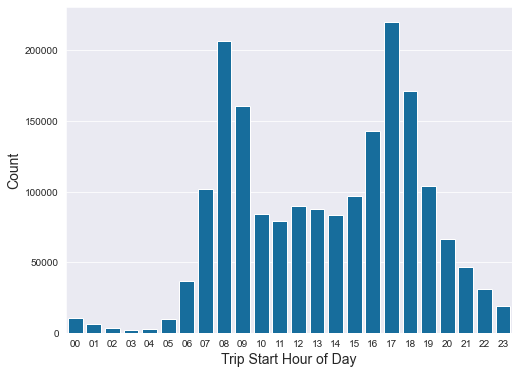

In [14]:
# Trip distribution over day hours

plt.rcParams['figure.figsize'] = 8, 6
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

gen_order = ['00','01','02','03','04','05','06', '07', '08', '09', '10', '11', '12', '13', '14', '15',
       '16', '17', '18', '19', '20', '21', '22','23']
sb.countplot(data=df_biketrips18_clean, x='start_hourofday', color=base_color, order = gen_order);
plt.xlabel('Trip Start Hour of Day', fontsize = 14);
plt.ylabel('Count', fontsize = 14);

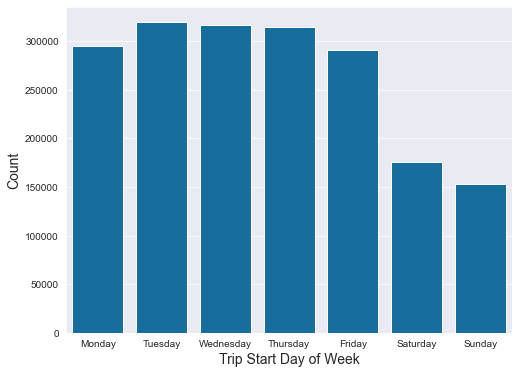

In [15]:
# Trip distribution over weekdays
# Issue 3: Cast 'start_dayofweek' to category dtype

# Code
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_biketrips18_clean['start_dayofweek'] = df_biketrips18_clean['start_dayofweek'].astype(weekdaycat)

sb.countplot(data=df_biketrips18_clean, x='start_dayofweek', color=base_color);
plt.xlabel('Trip Start Day of Week', fontsize = 14);
plt.ylabel('Count', fontsize = 14);

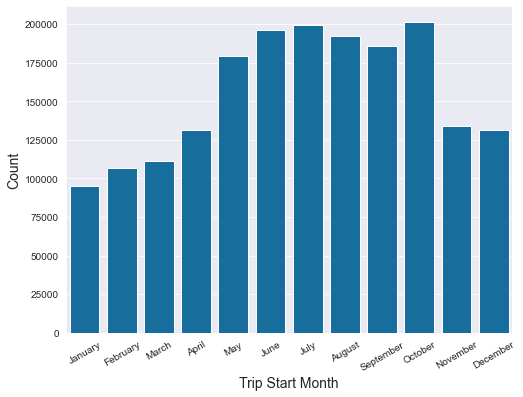

In [16]:
# Trip distribution over months
# Issue 4: Cast 'start_month' to category dtype for easy plotting

# Code
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df_biketrips18_clean['start_month'] = df_biketrips18_clean['start_month'].astype(monthcat)

sb.countplot(data=df_biketrips18_clean, x='start_month', color=base_color);
plt.xticks(rotation=30);
plt.xlabel('Trip Start Month', fontsize = 14);
plt.ylabel('Count', fontsize = 14);

The trip distribution over day hours peaks around two timeframes, 8am-9am and 17pm-18pm, during typical rush hours. Looking in combined with the trip distribution over day of week plot, it is quite obvious that the majority of rides happened on work days (Mon-Fri) and primary usage is probably for commuting. In the 12 months in 2018, October had the most ride trips compared to the others, but overall it was the most popular during summer time (May-Sept), probably due to the weather in the area.   

The next several plots are around members/users to see what makes up of the riders.

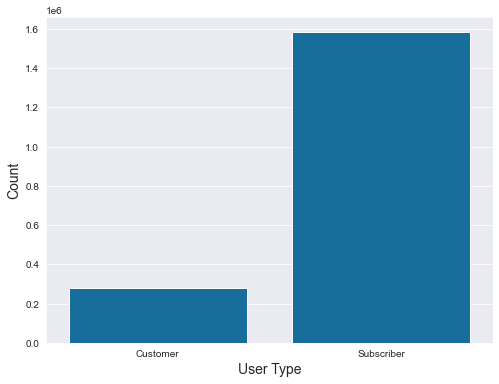

In [17]:
sb.countplot(data=df_biketrips18_clean, x='user_type', color=base_color);
plt.xlabel('User Type', fontsize = 14);
plt.ylabel('Count', fontsize = 14);

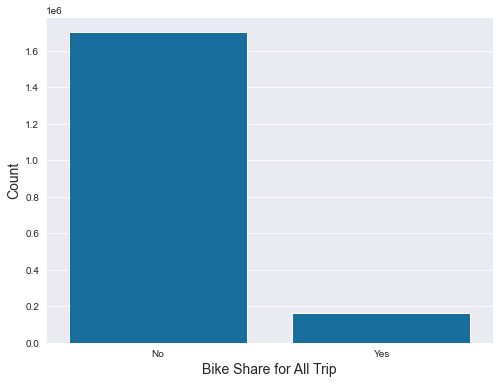

In [18]:
sb.countplot(data=df_biketrips18_clean, x='bike_share_for_all_trip', color=base_color);
plt.xlabel('Bike Share for All Trip', fontsize = 14);
plt.ylabel('Count', fontsize = 14);

**Trip duration distribution to plot next.**

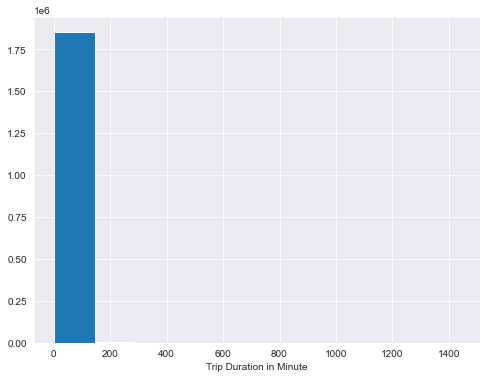

In [19]:
plt.hist(data = df_biketrips18_clean, x = 'duration_minute');
plt.xlabel('Trip Duration in Minute');

While the majority of the rides appear to be quite short (within 200 mins). Going to zoom in to the most cases for a closer picture of what the distribution is like.   

In [20]:
df_biketrips18_clean['duration_minute'].describe(percentiles=[.99])

count    1.863721e+06
mean     1.428838e+01
std      3.950631e+01
min      1.016667e+00
50%      9.266667e+00
99%      9.221667e+01
max      1.439433e+03
Name: duration_minute, dtype: float64

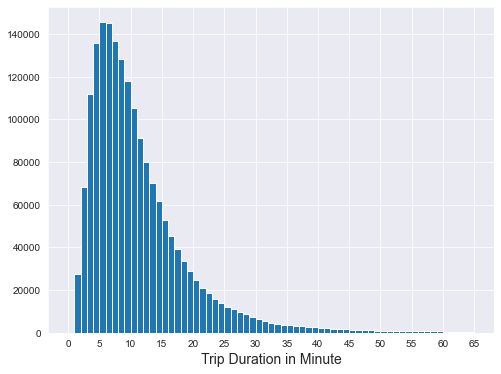

In [21]:
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=df_biketrips18_clean, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute', fontsize = 14);

It looks like 99% of the trips were less than 1 hour long with most of them fell between 5 to 10 minutes range. I'll remove the outlier long trips for this study to allow focusing on the most common cases to explore the pattern.

In [22]:
# Issue 5: Filter out outlier trip records where the duration was very long

# Code
df_biketrips18_clean = df_biketrips18_clean.query('duration_minute <= 66')

# Test to verify Issues' 3,4,5 were fixed
df_biketrips18_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1835478 entries, 6 to 1863720
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1835478 non-null  int64         
 1   start_time               1835478 non-null  datetime64[ns]
 2   end_time                 1835478 non-null  datetime64[ns]
 3   start_station_id         1835478 non-null  object        
 4   start_station_name       1824136 non-null  object        
 5   start_station_latitude   1835478 non-null  float64       
 6   start_station_longitude  1835478 non-null  float64       
 7   end_station_id           1835478 non-null  object        
 8   end_station_name         1824136 non-null  object        
 9   end_station_latitude     1835478 non-null  float64       
 10  end_station_longitude    1835478 non-null  float64       
 11  bike_id                  1835478 non-null  object        
 12  

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The number of trips peaked around 8-9 am and 5-6 pm during the day, there were more trips on work days (Mon-Fri) compared to weekends. Summer was the most popular season of a year, likely due to the weather. 


Most rides were quick and short, lasted between 5 to 10 minutes, though there were some very long outliers like 24hrs.

No transformation was needed luckily due to the straightforwardness of the data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution of the trip duration was a little surprising at first plotting out the original data. The pandas' describe() method and xticks() to zoom in to a smaller range where most trip records fell, which made the distribution much clearer were used. In order to help focusing on the main cases of typical use of the system, filtered out the outlier long trip records for the study with query() method. 

In [23]:
# Save cleaned data to CSV file

df_biketrips18_clean.to_csv('fordgobike_trips_2018_clean.csv', index=False)

## Bivariate Exploration

How does the trip duration distribution vary between customers and subscribers?

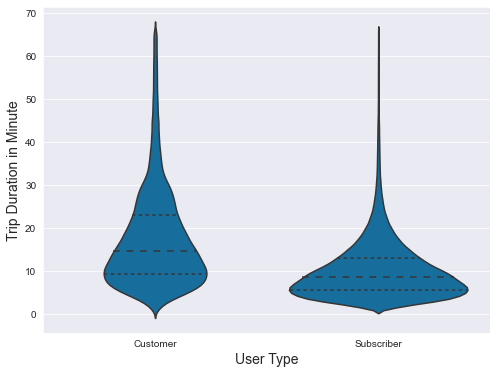

In [24]:
sb.violinplot(data=df_biketrips18_clean, x='user_type', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('User Type', fontsize = 14);
plt.ylabel('Trip Duration in Minute', fontsize = 14);

The trip duration distribution is much narrower for subscribers compared to casual riders on the shorter/quicker trip. Overall, subscribers have a more specific usage or targeted goal riding the bikes compared to customers who vary more and generally rented the bikes for longer.   

**Average Trip Duration on Weekdays**

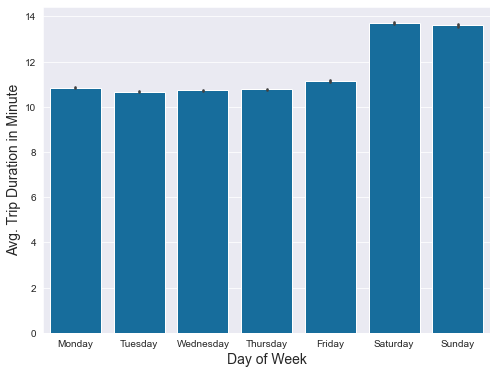

In [25]:
sb.barplot(data=df_biketrips18_clean, x='start_dayofweek', y='duration_minute', color=base_color);
plt.xlabel('Day of Week', fontsize = 14);
plt.ylabel('Avg. Trip Duration in Minute', fontsize = 14);

The riding trips are much shorter on Monday through Friday compared to weekends. It indicates a pretty stable and efficient usage of the sharing system on normal work days, while more casual flexible use on weekends. 

**Average trip duration by month**

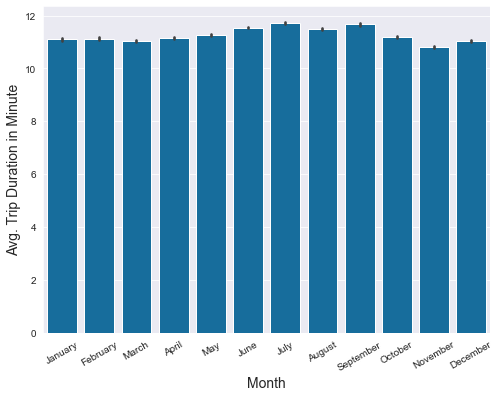

In [26]:
sb.barplot(data=df_biketrips18_clean, x='start_month', y='duration_minute', color=base_color);
plt.xticks(rotation=30);
plt.xlabel('Month', fontsize = 14);
plt.ylabel('Avg. Trip Duration in Minute', fontsize = 14);

Starting from March, the average usage time showns an increasing trend almost all the way til September and then goes down. The average longest trips happened during the summer months, around June, July and September, which probably has a lot to do with the weather in the area.

**Weekly usage between _customers_ and _subscribers_**

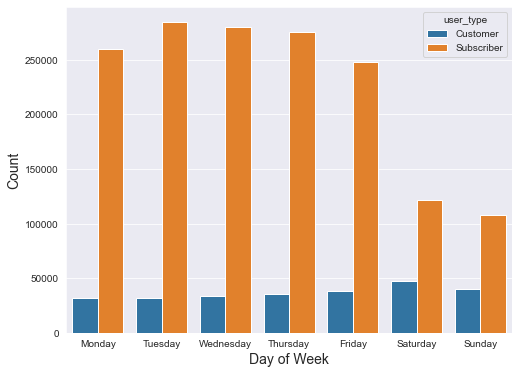

In [27]:
sb.countplot(data=df_biketrips18_clean, x='start_dayofweek', hue='user_type');
plt.xlabel('Day of Week', fontsize = 14);
plt.ylabel('Count', fontsize = 14);

There was more subscriber usage than casual customers. The drop of volume on weekends for subscribers indicates that they primarily ride bikes for work commute during work days, whereas almost the opposite pattern of a slight increase of use for customers on weekends demonstrates that the use was more for leisure/touring and relaxing purposes.  

**Daily usage between _customers_ and _subscribers_**

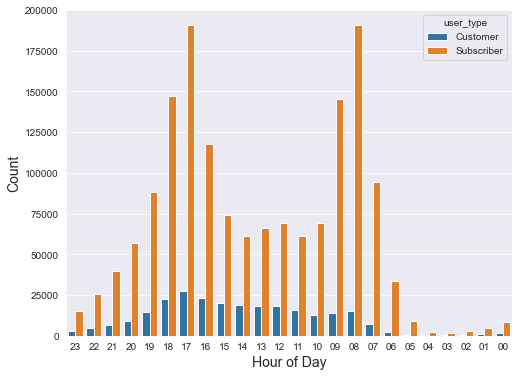

In [28]:
sb.countplot(data=df_biketrips18_clean, x='start_hourofday', hue='user_type');
plt.xlabel('Hour of Day', fontsize = 14);
plt.ylabel('Count', fontsize = 14);

Subscriber usage clearly peaks out on typical rush hours when people go to work in the morning and getting off work in the afternoon, Confirming their usage purpose and goal of riding. Similar pattern was not observed among customers who tend to ride most in the afternoon or early evening as for a different purpose than the subscriber riders.

**Yearly usage between customers and subscribers**

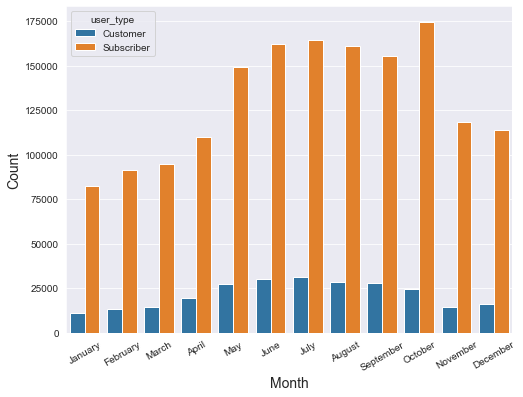

In [29]:
sb.countplot(data=df_biketrips18_clean, x='start_month', hue='user_type');
plt.xticks(rotation=30);
plt.xlabel('Month', fontsize = 14);
plt.ylabel('Count', fontsize = 14);

Both subscribers and customers ride the most during the summer months with subscribers maxed out in October and customers peaked in July. The usage was clearly not popular during winter season like November, December and January.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There is huge *subscriber* usage than *customers*-. The riding habit/pattern varies a lot between subscribers and customers. Subscribers use the bike sharing system for work commnute thus most trips were on work days (Mon-Fri) and especially during rush hours (when going to work in the morning and getting off work in the afternoon), whereas customers tend to ride for fun in the afternoon or early evenings over weekends. Subscriber users are slightly older than customer users who tend to take longer rides overall especially during the summer.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Interestingly, *subscribers* take much shorter/quicker rides. The month October had the most bike riding usage for subscribers throughout the year. 

## Multivariate Exploration

How does the average trip duration vary in weekdays between customers and subscribers?

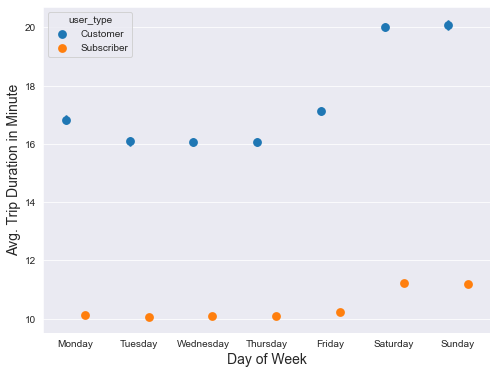

In [30]:
sb.pointplot(data=df_biketrips18_clean, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week', fontsize= 14);
plt.ylabel('Avg. Trip Duration in Minute', fontsize= 14);

It can be seen from the above plot that subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekdasy, especially for casual riders. Subscribers usage seems to be more efficient than customers overall and maintained a very consistent average duration Monday through Friday.     

**How does the hourly usage vary during weekdays for customers and subscribers?**

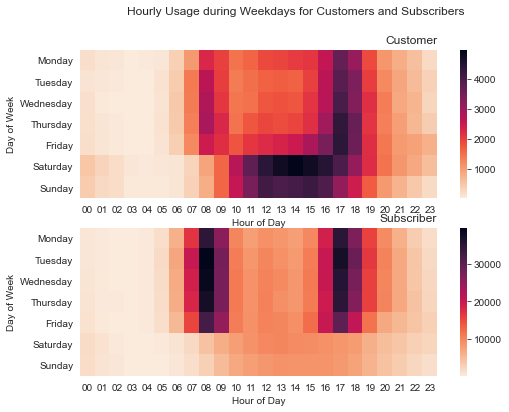

In [31]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

plt.subplot(2, 1, 1)
customers = df_biketrips18_clean.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df_biketrips18_clean.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

The heatmaps shows clearly very different usage pattern/habit between the two type of riders. Subscribers use the system heavily on work days i.e. Monday through Friday whereas customers ride a lot on weekends, especially in the afternoon. Many trips concentrated around 8-9 am and 5-6 pm on workdays for subscribers when used for work commute, yet customers tend to use more in the late afternoon around 5 pm Monday to Friday. Other than usage purpose and habit, it may also have to do with the traffic situation around these rush hours in the area.  

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate exploration strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration, the relationship between the multiple variables plotted are visualized altogether and information are presented combined. The efficient/short period of usage for subscribers corresponds to their high concentration on rush hours Monday through Friday, indicating the use is primarily for the work commute. The more relaxing and flexible pattern of customer use shows that they're taking advantage of the bike-sharing system quite different from the subscribers, heavily over weekends and in the afternoon, probably for city tour or leisure purpose. 

### Were there any interesting or surprising interactions between features?

The interactions between features are all supplementing each other and quite make sense when looked at combined, there's no big surprise observed. 